In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [60]:
from sklearn.preprocessing import LabelEncoder
label_company = LabelEncoder()
label_job = LabelEncoder()
label_degree = LabelEncoder()

In [61]:
df['company_n'] = label_company.fit_transform(df['company'])
df['job_n'] = label_job.fit_transform(df['job'])
df['degree_n'] = label_degree.fit_transform(df['degree'])

In [77]:
inputs = df.drop(['company','job','degree','salary_more_then_100k'], axis= 'columns')
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [64]:
from sklearn.model_selection import train_test_split

In [73]:
 X_train, X_test, y_train, y_test = train_test_split(inputs,df['salary_more_then_100k'], test_size = 0.5)

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
model.score(X_test, y_test)

0.75

In [83]:
model.predict([[1,1,1]])

array([1])

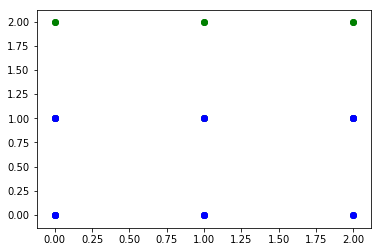

In [97]:
inputs2 = inputs.drop(['company_n'], axis= 'columns')
plt.scatter(inputs['job_n'],inputs['company_n'], color = 'green')
plt.scatter(inputs2['job_n'],inputs2['degree_n'], color = 'blue')
